In [1]:
from long_lat_multifamily_la2 import longitude_latitude_dict
import numpy as np
from geopy.distance import geodesic
import pandas as pd

In [2]:
# Get the length of the longitude_latitude_dict
num_locations = len(longitude_latitude_dict)
print(f"Total number of locations in the dataset: {num_locations}")


Total number of locations in the dataset: 2678


In [3]:


# Dictionary to store the count of nearby points for each location
nearby_points_count = {}

# Get all coordinates as a list for easier iteration
all_coords = list(longitude_latitude_dict.values())

# For each point, count how many other points are within 1200m
for i, (address, coords) in enumerate(longitude_latitude_dict.items()):
    if i % 100 == 0:
        print(f"Processing {i}/{len(longitude_latitude_dict)} addresses...")
    lat = coords[0]
    lon = coords[1]
    
    # Count nearby points (excluding itself)
    count = 0
    for other_coords in all_coords:
        other_lat = other_coords[0]
        other_lon = other_coords[1]
        
        # Skip if it's the same point
        if lat == other_lat and lon == other_lon:
            continue
        
        # Calculate distance in meters
        distance = geodesic((lat, lon), (other_lat, other_lon)).meters
        
        # Increment count if within 1200m
        if distance <= 1200:
            count += 1
    
    # Store the count for this address
    nearby_points_count[address] = count

# Create a DataFrame with address, lat, lon, and nearby points count

Processing 0/2678 addresses...
Processing 100/2678 addresses...
Processing 200/2678 addresses...
Processing 300/2678 addresses...
Processing 400/2678 addresses...
Processing 500/2678 addresses...
Processing 600/2678 addresses...
Processing 700/2678 addresses...
Processing 800/2678 addresses...
Processing 900/2678 addresses...
Processing 1000/2678 addresses...
Processing 1100/2678 addresses...
Processing 1200/2678 addresses...
Processing 1300/2678 addresses...
Processing 1400/2678 addresses...
Processing 1500/2678 addresses...
Processing 1600/2678 addresses...
Processing 1700/2678 addresses...
Processing 1800/2678 addresses...
Processing 1900/2678 addresses...
Processing 2000/2678 addresses...
Processing 2100/2678 addresses...
Processing 2200/2678 addresses...
Processing 2300/2678 addresses...
Processing 2400/2678 addresses...
Processing 2500/2678 addresses...
Processing 2600/2678 addresses...


AttributeError: 'DataFrame' object has no attribute 'append'

In [5]:
# Initialize a list to store the data
data = []

# Populate the list with dictionaries
for address, count in nearby_points_count.items():
    coords = longitude_latitude_dict[address]
    data.append({
        'address': address,
        'latitude': coords[0],
        'longitude': coords[1],
        'nearby_points_within_1200m': count
    })

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(f"Created DataFrame with {len(df)} rows")
df.head()

Created DataFrame with 2678 rows


,address,latitude,longitude,nearby_points_within_1200m
0,"11418 Missouri Avenue Los Angeles, CA 90025",34.041129,-118.447062,42
1,"1408 West Jefferson Boulevard Los Angeles, ...",34.025428,-118.297396,24
2,"11750 Wilshire Blvd Los Angeles, CA 90025",34.048576,-118.461807,23
3,"520 North Glendale Avenue Glendale, CA 91206",34.153779,-118.242876,13
4,"1414 N Las Palmas Avenue Los Angeles, CA 90028",34.096716,-118.336470,81


In [6]:
# Export the DataFrame to a CSV file
df.to_csv('countnearby.csv', index=False)
print("DataFrame exported to nearby.csv successfully")


DataFrame exported to nearby.csv successfully


Statistics for nearby points within 1200m:
count    2678.000000
mean       28.883495
std        26.727178
min         0.000000
25%         6.000000
50%        21.000000
75%        46.000000
max       118.000000
Name: nearby_points_within_1200m, dtype: float64


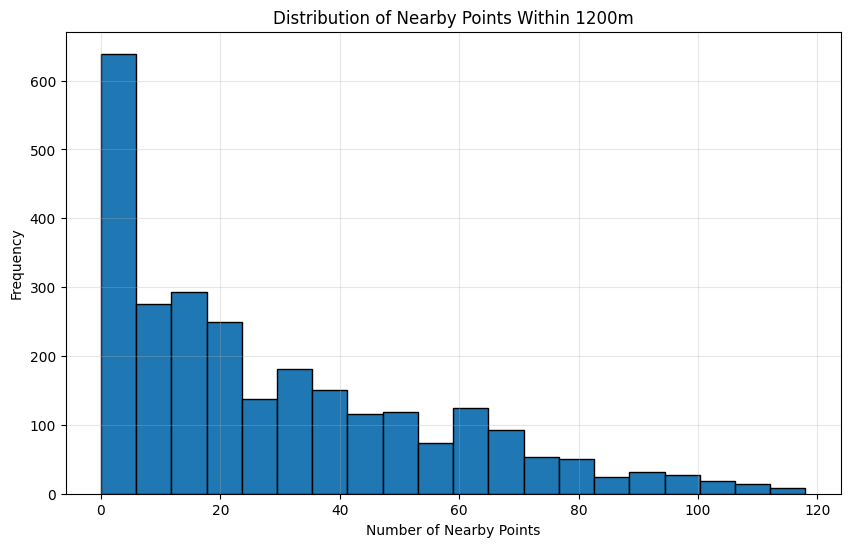


Location with most nearby points (118 points):
Address: 888 Vermont Avenue    Los Angeles, CA 90005
Coordinates: (34.0560498, -118.2913733)

Location with least nearby points (0 points):
Address: 901 Pacific Coast Highway    Seal Beach, CA 90740
Coordinates: (33.7444934, -118.1023288)


In [7]:
# Calculate statistics on nearby_points_within_1200m
stats = df['nearby_points_within_1200m'].describe()
print("Statistics for nearby points within 1200m:")
print(stats)

# Create a histogram to visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['nearby_points_within_1200m'], bins=20, edgecolor='black')
plt.title('Distribution of Nearby Points Within 1200m')
plt.xlabel('Number of Nearby Points')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Find addresses with the most and least nearby points
most_nearby = df.loc[df['nearby_points_within_1200m'].idxmax()]
least_nearby = df.loc[df['nearby_points_within_1200m'].idxmin()]

print(f"\nLocation with most nearby points ({most_nearby['nearby_points_within_1200m']} points):")
print(f"Address: {most_nearby['address']}")
print(f"Coordinates: ({most_nearby['latitude']}, {most_nearby['longitude']})")

print(f"\nLocation with least nearby points ({least_nearby['nearby_points_within_1200m']} points):")
print(f"Address: {least_nearby['address']}")
print(f"Coordinates: ({least_nearby['latitude']}, {least_nearby['longitude']})")
